In [21]:
import OpenEXR
import Imath
from PIL import Image
import sys
import numpy as np
import imageio
imageio.plugins.freeimage.download()
# import matplotlib.plt as plt
import cv2
from skimage.measure import label, regionprops

In [22]:
# !python -m pip install bpy && bpy_post_install
# https://cgcooke.github.io/Blog/computer%20vision/blender/2020/10/30/Training-Data-From-OpenEXR.html
from PIL import Image
import OpenEXR
import Imath
import numpy
import OpenEXR
import Imath
from PIL import Image
import array
import numpy as np
import json

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = [20,20]

FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
def encode_to_srgb(x):
    a = 0.055
    return numpy.where(x <= 0.0031308,
                       x * 12.92,
                       (1 + a) * pow(x, 1 / 2.4) - a)
def exr_to_srgb(exrfile):
    array = exr_to_array(exrfile)
    result = encode_to_srgb(array) * 255.
    present_channels = ["R", "G", "B", "A"][:result.shape[2]]
    channels = "".join(present_channels)
    return Image.fromarray(result.astype('uint8'), channels)

def exr_to_array(exrfile):
    file = OpenEXR.InputFile(exrfile)
    dw = file.header()['dataWindow']

    channels = file.header()['channels'].keys()
    channels_list = list()
    for c in ('R', 'G', 'B', 'A'):
        if c in channels:
            channels_list.append(c)

    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
    color_channels = file.channels(channels_list, FLOAT)
    channels_tuple = [numpy.fromstring(channel, dtype='f') for channel in color_channels]
    res = numpy.dstack(channels_tuple)
    return res.reshape(size + (len(channels_tuple),))

def exr2numpy(exr_path, chanel_name):
    '''
    See:
    https://excamera.com/articles/26/doc/intro.html
    http://www.tobias-weis.de/groundtruth-data-for-computer-vision-with-blender/
    '''
    file = OpenEXR.InputFile(exr_path)
    dw = file.header()['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
    
    Float_Type = Imath.PixelType(Imath.PixelType.FLOAT)
    
    channel_str = file.channel(chanel_name, Float_Type)
    
    channel = np.fromstring(channel_str, dtype = np.float32).reshape(size[1],-1)
    
    return(channel)

In [23]:
from collections import namedtuple
A = namedtuple("Keypoints", ["RIGHT_SHOE_FRONT","RIGHT_SHOE_TOP", "RIGHT_SHOE_OUTER_SIDE", "RIGHT_SHOE_INNER_SIDE", "RIGHT_SHOE_BACK", "RIGHT_SHOE_ANKLE","LEFT_SHOE_BACK","LEFT_SHOE_ANKLE","LEFT_SHOE_OUTER_SIDE","LEFT_SHOE_TOP","LEFT_SHOE_INNER_SIDE","LEFT_SHOE_FRONT","BODY","RIGHT_SHOE","LEFT_SHOE"], defaults=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
[o for o in A()]
100 in A()

False

In [24]:
from typing import DefaultDict, List, Tuple, Dict
from dataclasses import dataclass, field
@dataclass(frozen=False)
class Keypoints():
    RIGHT_SHOE_FRONT: int =1
    RIGHT_SHOE_TOP: int =2
    RIGHT_SHOE_OUTER_SIDE: int =3
    RIGHT_SHOE_INNER_SIDE: int =4
    RIGHT_SHOE_BACK: int =5
    RIGHT_SHOE_ANKLE: int =6
    LEFT_SHOE_BACK: int = 7
    LEFT_SHOE_ANKLE: int =8
    LEFT_SHOE_OUTER_SIDE: int =9
    LEFT_SHOE_TOP: int =10
    LEFT_SHOE_INNER_SIDE: int =11
    LEFT_SHOE_FRONT: int = 12
    BODY: int =13
    RIGHT_SHOE: int =14
    LEFT_SHOE: int =15
    lookup: Dict = field(default_factory=lambda:{
    1: "RIGHT_SHOE_FRONT",
    2: "RIGHT_SHOE_TOP",
    3: "RIGHT_SHOE_OUTER_SIDE",
    4: "RIGHT_SHOE_INNER_SIDE",
    5: "RIGHT_SHOE_BACK",
    6: "RIGHT_SHOE_ANKLE",
    7:"LEFT_SHOE_BACK",
    8:"LEFT_SHOE_ANKLE",
    9:"LEFT_SHOE_OUTER_SIDE",
    10:"LEFT_SHOE_TOP",
    11:"LEFT_SHOE_INNER_SIDE",
    12:"LEFT_SHOE_FRONT",
    13:"BODY",
    14:"RIGHT_SHOE",
    15:"LEFT_SHOE"
    })
    @staticmethod
    def labels()->List[str]:
        # TODO: make it better
        labels = list(Keypoints.__dataclass_fields__.keys())
        labels.sort()
        return labels
    @staticmethod
    def parts():
        return (Keypoints.BODY, Keypoints.LEFT_SHOE, Keypoints.RIGHT_SHOE)


In [25]:
Keypoints().lookup

{1: 'RIGHT_SHOE_FRONT',
 2: 'RIGHT_SHOE_TOP',
 3: 'RIGHT_SHOE_OUTER_SIDE',
 4: 'RIGHT_SHOE_INNER_SIDE',
 5: 'RIGHT_SHOE_BACK',
 6: 'RIGHT_SHOE_ANKLE',
 7: 'LEFT_SHOE_BACK',
 8: 'LEFT_SHOE_ANKLE',
 9: 'LEFT_SHOE_OUTER_SIDE',
 10: 'LEFT_SHOE_TOP',
 11: 'LEFT_SHOE_INNER_SIDE',
 12: 'LEFT_SHOE_FRONT',
 13: 'BODY',
 14: 'RIGHT_SHOE',
 15: 'LEFT_SHOE'}

In [30]:
import OpenEXR

import Imath
import numpy as np
# import png
import sys
# import wf.data as utils
filename = "../data/v004/TRAIN_v004_MAIN_.0004.exr"
filename_id = "../data/v004/TRAIN_v004_ID_.0004.exr"
# RGB = exr2rgb(filename)
mask = exr2numpy(filename_id, 'ObjectID')
np.unique(mask)
# props = [o for o in regionprops(mask.astype('int')) if o.label in Keypoints.parts()]
# Keypoints.parts()


/tmp/ipykernel_4784/2621969336.py:61: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  channel = np.fromstring(channel_str, dtype = np.float32).reshape(size[1],-1)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

In [23]:
Keypoints.labels()

['BODY',
 'LEFT_SHOE',
 'LEFT_SHOE_ANKLE',
 'LEFT_SHOE_BACK',
 'LEFT_SHOE_FRONT',
 'LEFT_SHOE_INNER_SIDE',
 'LEFT_SHOE_OUTER_SIDE',
 'LEFT_SHOE_TOP',
 'RIGHT_SHOE',
 'RIGHT_SHOE_ANKLE',
 'RIGHT_SHOE_BACK',
 'RIGHT_SHOE_FRONT',
 'RIGHT_SHOE_INNER_SIDE',
 'RIGHT_SHOE_OUTER_SIDE',
 'RIGHT_SHOE_TOP']

In [ ]:
# mask = 
fig = plt.figure()
# plt.imshow(RGB, alpha=0.8)
plt.imshow(mask, alpha=0.5)
plt.colorbar()
plt.show()
# RGB


In [5]:
# np.unique(mask)
from dataclasses import dataclass
from typing import List, Tuple, Dict
FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
from pydantic import BaseModel
@dataclass(frozen=False)
class Keypoints():
    LEFT_SHOE_FRONT: int = 12
    LEFT_SHOE_BACK: int = 7
    LEFT_SHOE_INNER_SIDE: int =11
    LEFT_SHOE_OUTER_SIDE: int =9
    LEFT_SHOE_TOP: int =10
    LEFT_SHOE_ANKLE: int =8
    RIGHT_SHOE_FRONT: int =1
    RIGHT_SHOE_BACK: int =5
    RIGHT_SHOE_INNER_SIDE: int =4
    RIGHT_SHOE_OUTER_SIDE: int =3
    RIGHT_SHOE_TOP: int =2
    RIGHT_SHOE_ANKLE: int =6
    LEFT_SHOE: int =15
    RIGHT_SHOE: int =14
    BODY: int =13
    @staticmethod
    def name(value):
        [o.key for o in Keypoints.__dataclass_fields__ if o.value == value]
    @staticmethod
    def labels()->List[str]:
        # TODO: make it better
        labels = list(Keypoints.__dataclass_fields__.keys())
        labels.sort()
        return labels

class MetaData(BaseModel):
    source: Dict[str, str]
    keypoints: List[Tuple[int, int]]
    keypoint_labels: List[str] = Keypoints.labels()
    visible: List[bool] = [False]*len(Keypoints.labels())
    bounding_boxes: Dict[str, Tuple[int, int, int,int]]

In [16]:
a=[o[0] for o in Keypoints.__dataclass_fields__.items() if o[1] == "test"]
print(a)

a

[]


[]

In [ ]:
from scipy import ndimage
ndimage.measurements.center_of_mass((mask == Keypoints.LEFT_SHOE).astype('int'))
m=MetaData(source={"tsts":"ss"}, keypoints=[], bounding_boxes={"r":(1,1,1,1)})
m.json()

'{"source": {"tsts": "ss"}, "keypoints": [], "keypoint_labels": ["BODY", "LEFT_SHOE", "LEFT_SHOE_ANKLE", "LEFT_SHOE_BACK", "LEFT_SHOE_FRONT", "LEFT_SHOE_INNER_SIDE", "LEFT_SHOE_OUTER_SIDE", "LEFT_SHOE_TOP", "RIGHT_SHOE", "RIGHT_SHOE_ANKLE", "RIGHT_SHOE_BACK", "RIGHT_SHOE_FRONT", "RIGHT_SHOE_INNER_SIDE", "RIGHT_SHOE_OUTER_SIDE", "RIGHT_SHOE_TOP"], "visible": [false, false, false, false, false, false, false, false, false, false, false, false, false, false, false], "bounding_boxes": {"r": [1, 1, 1, 1]}}'

In [12]:

a=getattr(Keypoints,"BODY")
a==13

True

In [6]:
file = OpenEXR.InputFile(filename_id)
file.header()
# exr2numpy(filename_id, 'channel_name')


{'cameraAperture': 36.0,
 'cameraFNumber': 4.3456034660339355,
 'cameraFarClip': 1.0000000150474662e+30,
 'cameraFarRange': 100000.0,
 'cameraFocalLength': 43.45603561401367,
 'cameraFov': 44.999820709228516,
 'cameraNearClip': 0.0,
 'cameraNearRange': 0.0,
 'cameraProjection': 0,
 'cameraTargetDistance': 200.0,
 'cameraTransform': None,
 'channels': {'A': HALF (1, 1),
  'B': HALF (1, 1),
  'G': HALF (1, 1),
  'ObjectID': UINT (1, 1),
  'R': HALF (1, 1)},
 'compression': ZIPS_COMPRESSION,
 'dataWindow': (0, 0) - (1919, 1439),
 'displayWindow': (0, 0) - (1919, 1439),
 'lineOrder': INCREASING_Y,
 'name': b'',
 'pixelAspectRatio': 1.0,
 'screenWindowCenter': (0.0, 0.0),
 'screenWindowWidth': 1.0,
 'type': b'scanlineimage',
 'vrayChannelInfo': b'{"Alpha":{"alias":125,"index":1,"flags":16389},"RGB color":{"alias":126,"index":0,"flags":16385},"ObjectID":{"alias":116,"index":2,"flags":1044}}',
 'vrayInfo/camera': b'PhysCamera001',
 'vrayInfo/computername': b'fx02',
 'vrayInfo/cpu': b'INTEL/P2

In [ ]:
file = OpenEXR.InputFile(sys.argv[1])
ch = file.channel('ObjectID', Imath.PixelType(Imath.PixelType.UINT))
dw = file.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
arr = np.frombuffer(ch, dtype = np.uintc)
arr.shape = (size[1], size[0])
w = png.Writer(arr.shape[1], arr.shape[0], greyscale=True, bitdepth=16)
f = open(sys.argv[2], 'wb')
w.write(f, arr)
f.close()

In [9]:
filename = "../data/v004/TRAIN_v004_MAIN_.0000.exr"
golden = OpenEXR.InputFile(filename)
golden.header()
semantic_index = exr2numpy(filename, "")
fig = plt.figure()
plt.imshow(semantic_index)
plt.colorbar()
plt.show()
image_full = imageio.imread(filename)
image_full

TypeError: There is no channel '' in the image

(1920, 1440)


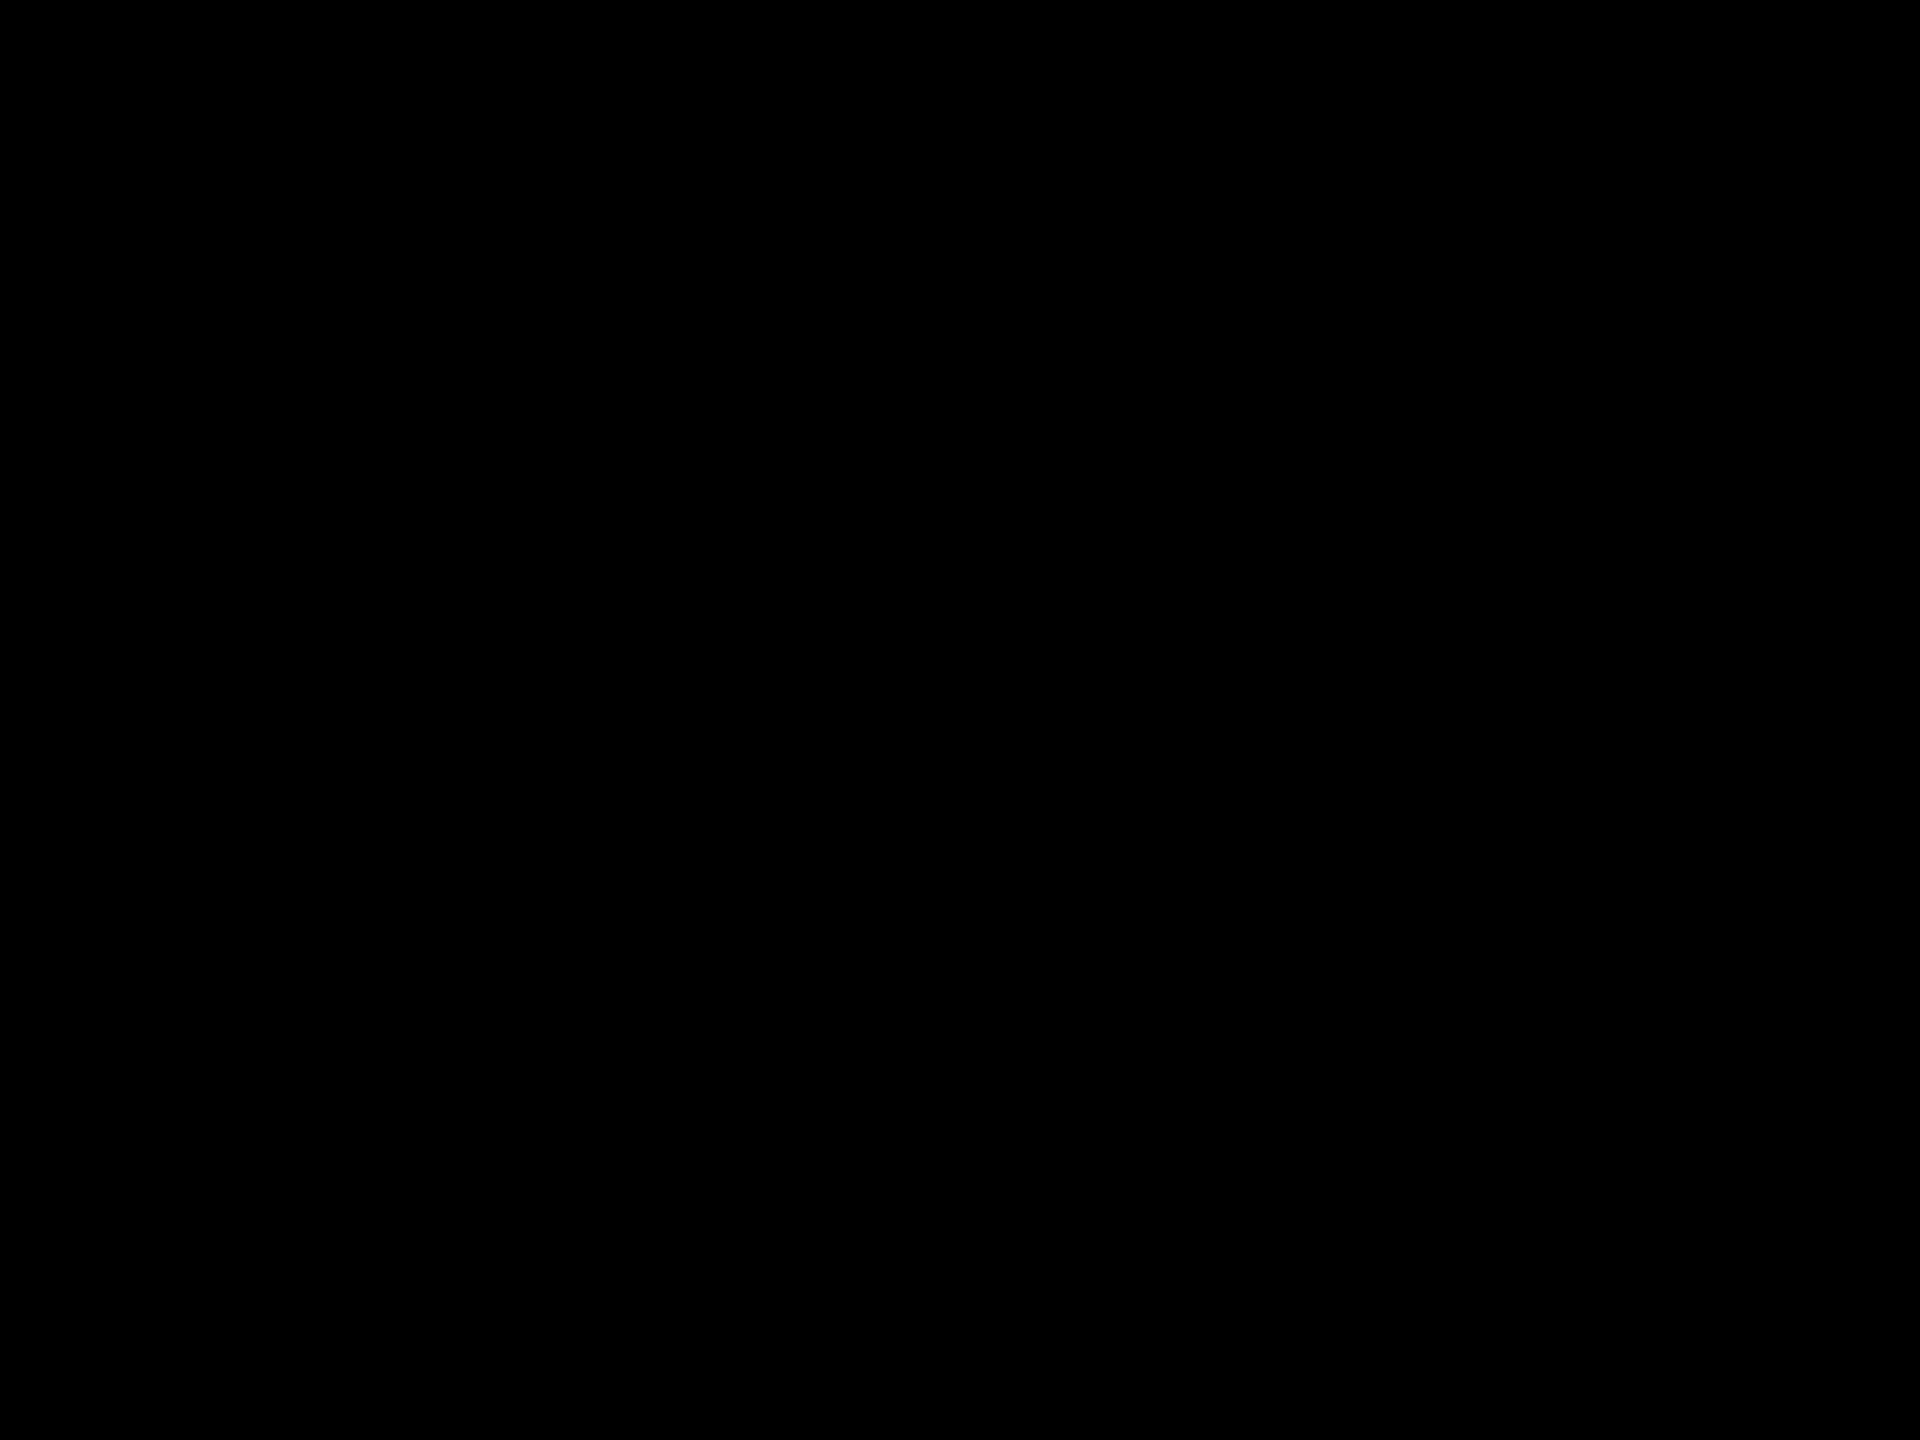

In [17]:

dw = golden.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
print(size)
mask = Image.frombytes(mode="L", size=size,data=golden.channel('R'))
mask

In [46]:

image_full = imageio.imread(filename)
# mask = image_full[:,:,3:]
image = image_full[:,:,:]
# mask = 65535 * mask
# data = 65535 * image
# data[data>65535]=65535
# mask[mask>65535]=65535
# rgb_image = data.astype('uint16')
# mask_image = mask.astype('uint16')
# print(rgb_image.dtype)
#rgb_image = imageio.core.image_as_uint(rgb_image, bitdepth=16)

imageio.imwrite("jpg_file.jpg", image, format='png')
# image

imageio.freeimage warning: Warning: converting color model A/B/G/ObjectID/R to RGBA color model Warning: converting color model A/B/G/ObjectID/R to RGBA color model
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [44]:
# help(imageio.imread)
image_full

Array([[[0.06347656, 0.0647583 , 0.1038208 , 1.        ],
        [0.0557251 , 0.05682373, 0.09112549, 1.        ],
        [0.05596924, 0.05706787, 0.09155273, 1.        ],
        ...,
        [0.02145386, 0.0218811 , 0.03509521, 1.        ],
        [0.01977539, 0.02015686, 0.03234863, 1.        ],
        [0.0206604 , 0.02105713, 0.03378296, 1.        ]],

       [[0.05670166, 0.05780029, 0.0927124 , 1.        ],
        [0.05664062, 0.05776978, 0.09265137, 1.        ],
        [0.05627441, 0.05737305, 0.09204102, 1.        ],
        ...,
        [0.02056885, 0.02098083, 0.03363037, 1.        ],
        [0.02217102, 0.02259827, 0.03625488, 1.        ],
        [0.02243042, 0.02287292, 0.03668213, 1.        ]],

       [[0.05740356, 0.05853271, 0.09387207, 1.        ],
        [0.06036377, 0.06152344, 0.09869385, 1.        ],
        [0.05935669, 0.06051636, 0.0970459 , 1.        ],
        ...,
        [0.02209473, 0.02252197, 0.03613281, 1.        ],
        [0.02055359, 0.020950

In [14]:
dw = golden.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
pt = Imath.PixelType(Imath.PixelType.FLOAT)
redstr = golden.channel('R', pt)
red = np.fromstring(redstr, dtype = np.float32)
# red = Image.fromstring("F", size, redstr)
# red.shape = (size[1], size[0]) # Numpy arrays are (row, col)
im = Image.fromarray(np.uint8(red))
im.save("image.png")
pt.v.real

<ipython-input-14-ff803879ee2a>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  red = np.fromstring(redstr, dtype = np.float32)


2

In [5]:
golden.isComplete()

True

In [6]:
help(golden.channels)

Help on built-in function channels:

channels(...) method of OpenEXR.InputFile instance



In [8]:
golden.header()

{'cameraAperture': 36.0,
 'cameraFNumber': 4.3455328941345215,
 'cameraFarClip': 1.0000000150474662e+30,
 'cameraFarRange': 100000.0,
 'cameraFocalLength': 43.455326080322266,
 'cameraFov': 45.00048065185547,
 'cameraNearClip': 0.0,
 'cameraNearRange': 0.0,
 'cameraProjection': 0,
 'cameraTargetDistance': 200.0,
 'cameraTransform': None,
 'channels': {'A': HALF (1, 1),
  'B': HALF (1, 1),
  'G': HALF (1, 1),
  'R': HALF (1, 1),
  'VRayCryptomatte.A': HALF (1, 1),
  'VRayCryptomatte.B': HALF (1, 1),
  'VRayCryptomatte.G': HALF (1, 1),
  'VRayCryptomatte.R': HALF (1, 1),
  'VRayCryptomatte00.A': FLOAT (1, 1),
  'VRayCryptomatte00.B': FLOAT (1, 1),
  'VRayCryptomatte00.G': FLOAT (1, 1),
  'VRayCryptomatte00.R': FLOAT (1, 1),
  'VRayCryptomatte01.A': FLOAT (1, 1),
  'VRayCryptomatte01.B': FLOAT (1, 1),
  'VRayCryptomatte01.G': FLOAT (1, 1),
  'VRayCryptomatte01.R': FLOAT (1, 1),
  'VRayCryptomatte02.A': FLOAT (1, 1),
  'VRayCryptomatte02.B': FLOAT (1, 1),
  'VRayCryptomatte02.G': FLOAT (1,

In [25]:
import Imath
size
dw

(0, 0) - (1919, 1439)

In [34]:
Image.frombytes(mode="RGBA", size=size,data=golden.channels(["VRayCryptomatte.A", "VRayCryptomatte.G","VRayCryptomatte.R", "VRayCryptomatte.B"]), decoder_name="raw")

TypeError: a bytes-like object is required, not 'list'

In [15]:
help(Image.frombytes)

Help on function frombytes in module PIL.Image:

frombytes(mode, size, data, decoder_name='raw', *args)
    Creates a copy of an image memory from pixel data in a buffer.
    
    In its simplest form, this function takes three arguments
    (mode, size, and unpacked pixel data).
    
    You can also use any pixel decoder supported by PIL.  For more
    information on available decoders, see the section
    :ref:`Writing Your Own File Decoder <file-decoders>`.
    
    Note that this function decodes pixel data only, not entire images.
    If you have an entire image in a string, wrap it in a
    :py:class:`~io.BytesIO` object, and use :py:func:`~PIL.Image.open` to load
    it.
    
    :param mode: The image mode. See: :ref:`concept-modes`.
    :param size: The image size.
    :param data: A byte buffer containing raw data for the given mode.
    :param decoder_name: What decoder to use.
    :param args: Additional parameters for the given decoder.
    :returns: An :py:class:`~PIL.Im

In [31]:
help(golden.channels)

Help on built-in function channels:

channels(...) method of OpenEXR.InputFile instance



In [37]:
# golden.channels(["VRayCryptomatte.A", "VRayCryptomatte.G","VRayCryptomatte.R", "VRayCryptomatte.B"])

In [5]:
import torchvision
from torchvision import utils
utils.draw_bounding_boxes()

torch.Size([3, 1440, 1920])


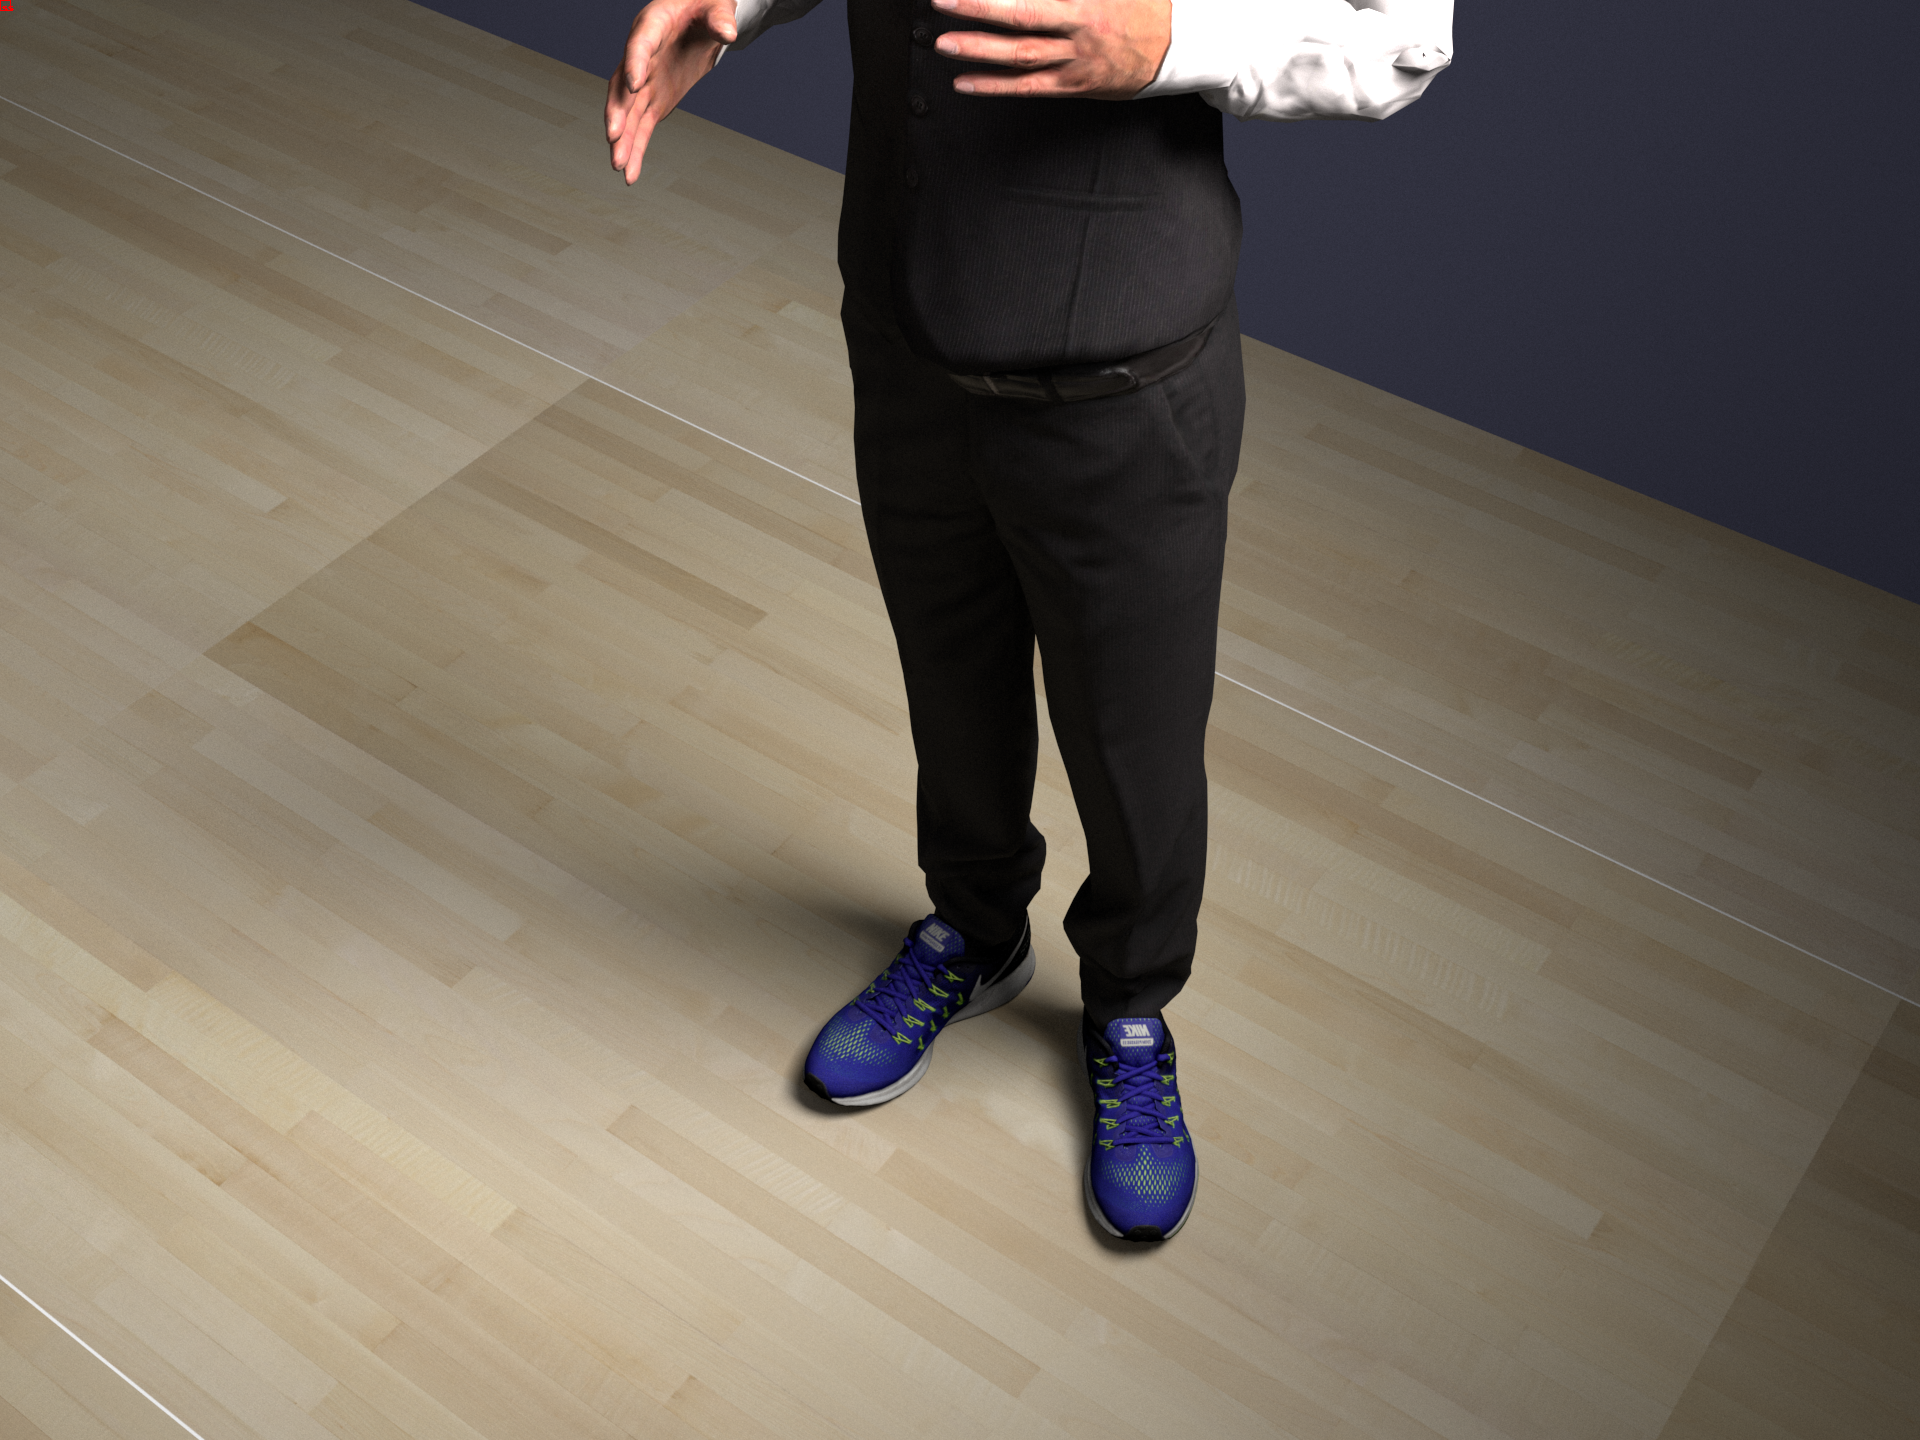

In [19]:

from torchvision import utils
import PIL
import torch
from torchvision import transforms
loader = transforms.Compose([
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.uint8)
    ])  
image = PIL.Image.open("/mnt/vol_b/clean_data/v004/TRAIN_v004_MAIN_.0110.png").convert('RGB')
def draw_keypoints(image, bounding_boxes):
    image_t = loader(image)
    print (image_t.shape)
    result = utils.draw_bounding_boxes(image_t, torch.tensor([[0,0,10,10]], dtype=torch.float), labels=['ss'], colors=["red"])
    return result
res = draw_keypoints(image, {"bjsjsjs":[100,100,1000,1000]})
PIL.Image.fromarray(res.permute(1, 2, 0).numpy())
# image


In [19]:
loader(image)

TypeError: __array__() takes 1 positional argument but 2 were given

NameError: name 'image_t' is not defined

In [17]:
 transforms.ConvertImageDtype

torchvision.transforms.transforms.ConvertImageDtype

In [15]:
utils.draw_keypoints_and_boxes

AttributeError: module 'torchvision.utils' has no attribute 'draw_keypoints_and_boxes'

In [20]:
help(utils.draw_bounding_boxes)

Help on function draw_bounding_boxes in module torchvision.utils:

draw_bounding_boxes(image: torch.Tensor, boxes: torch.Tensor, labels: Union[List[str], NoneType] = None, colors: Union[List[Union[str, Tuple[int, int, int]]], NoneType] = None, fill: Union[bool, NoneType] = False, width: int = 1, font: Union[str, NoneType] = None, font_size: int = 10) -> torch.Tensor
    Draws bounding boxes on given image.
    The values of the input image should be uint8 between 0 and 255.
    If fill is True, Resulting Tensor should be saved as PNG image.
    
    Args:
        image (Tensor): Tensor of shape (C x H x W) and dtype uint8.
        boxes (Tensor): Tensor of size (N, 4) containing bounding boxes in (xmin, ymin, xmax, ymax) format. Note that
            the boxes are absolute coordinates with respect to the image. In other words: `0 <= xmin < xmax < W` and
            `0 <= ymin < ymax < H`.
        labels (List[str]): List containing the labels of bounding boxes.
        colors (List[Uni